# Demo Practical 3

In [31]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import utils
import xarray as xr

**Load data:**

In [14]:
path = os.getcwd()
dataframe = utils.munich_station_monthly(location=path)
dataframe

,STATIONS_ID,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
MESS_DATUM_BEGINN,,,,,,,,,,,,,,,,
1954-06-01,3379,1954-06-30,1,-999.00,16.64,20.90,12.06,-999.00,29.3,-999.0,6.6,-999.00,1,78.3,23.3,eor
1954-07-01,3379,1954-07-31,1,-999.00,15.37,19.46,11.91,-999.00,26.9,-999.0,8.0,-999.00,1,279.6,60.7,eor
1954-08-01,3379,1954-08-31,1,-999.00,16.30,21.53,12.34,-999.00,30.2,-999.0,8.5,-999.00,1,99.6,26.8,eor
1954-09-01,3379,1954-09-30,1,-999.00,14.68,19.15,10.79,-999.00,26.8,-999.0,2.2,-999.00,1,133.9,37.3,eor
1954-10-01,3379,1954-10-31,1,-999.00,9.87,14.76,6.02,-999.00,23.2,-999.0,0.6,-999.00,1,62.7,27.1,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,3379,2018-08-31,3,4.55,21.51,27.58,16.08,2.03,35.1,19.3,8.3,286.40,3,101.1,25.1,eor
2018-09-01,3379,2018-09-30,3,4.70,16.20,22.21,10.93,2.00,29.3,21.0,2.7,234.00,3,118.0,24.5,eor
2018-10-01,3379,2018-10-31,3,4.67,11.50,17.35,6.83,2.10,25.1,19.7,1.2,173.33,3,45.6,24.5,eor


In [15]:
dataset = utils.munich_station_monthly(location=path, to_xarray=True)
dataset

<xarray.Dataset>
Dimensions:  (time: 775)
Coordinates:
  * time     (time) datetime64[ns] 1954-06-01 1954-07-01 ... 2018-12-01
Data variables:
    t_mean   (time) float64 16.64 15.37 16.3 14.68 9.87 ... 16.2 11.5 5.23 3.62
    t_max    (time) float64 20.9 19.46 21.53 19.15 ... 22.21 17.35 8.74 6.23
    t_min    (time) float64 12.06 11.91 12.34 10.79 6.02 ... 10.93 6.83 2.66 1.1

* `MO_TT` is the monthly mean of the daily mean, renamed to `t_mean`
* `MO_TX` is the monthly mean of the daily min, renamed to `t_min`
* `MO_TN` is the monthly mean of the daily max, renamed to `t_max`
* renamed `MESS_DATUM_BEGINN` to `time`

**significance-testing: t value to p value**

p values: 0.03349974395165134


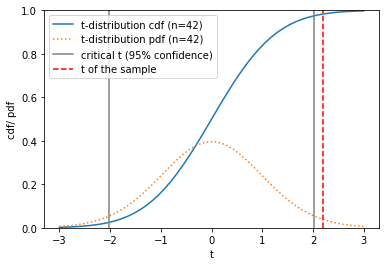

In [16]:
# for illustration: assume that sample exists of 42 datapoints and t test finds t=2.2
n = 42
t_sample = 2.2

# plot the pdf and the cdf of the t-distribution
t_to_plot = np.linspace(-3, 3)
cdf_to_plot = scipy.stats.t.cdf(t_to_plot, df=n - 1)
pdf_to_plot = scipy.stats.t.pdf(t_to_plot, df=n - 1)
plt.plot(t_to_plot, cdf_to_plot, label="t-distribution cdf (n={})".format(n))
plt.plot(t_to_plot, pdf_to_plot, label="t-distribution pdf (n={})".format(n), ls=":")


# the t_crit is the t value for which only 2.5% of values lie obove (and 97.5% below)
t_crit = scipy.stats.t.ppf(0.975, df=n - 1)  # if alpha is 5%

# visualize the critical t-values (2-sided, so t at which cdf is 2.5% and 97.5%)
plt.axvline(t_crit, c="gray", label="critical t (95% confidence)")
plt.axvline(-t_crit, c="gray")

# visualize the t value that was revealed by the t-test:
plt.axvline(t_sample, ls="--", c="r", label="t of the sample")

# where in the cdf lies the t value that was revealed by the t test?
cdf_sample = scipy.stats.t.cdf(t_sample, df=n - 1)
# p value:
print("p values:", np.abs(1 - cdf_sample) * 2)


plt.ylim(0, 1)
plt.xlabel("t")
plt.ylabel("cdf/ pdf")
plt.legend()
plt.show()

TASK 3

Ex 1

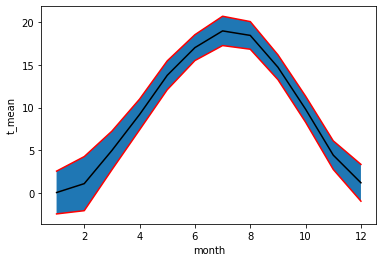

In [17]:
data = utils.munich_station_monthly(to_xarray = True)
temp_monthly_mean = data.t_mean.groupby('time.month').mean()
temp_monthly_mean_plus_std = data.t_mean.groupby('time.month').std() + temp_monthly_mean
temp_monthly_mean_minus_std = temp_monthly_mean - data.t_mean.groupby('time.month').std() 
temp_monthly_mean.plot(color='k')
temp_monthly_mean_minus_std.plot(color='r')
temp_monthly_mean_plus_std.plot(color='r')

plt.fill_between(temp_monthly_mean.month, temp_monthly_mean_minus_std, temp_monthly_mean_plus_std)


Ex 2

In [18]:
n = 12
temp_monthly_des = data.t_mean.groupby('time.month')-data.t_mean.groupby('time.month').mean()
temp_2017_des = temp_monthly_des.sel(time=('2017'))
temp_mean_2017 = temp_2017_des.mean()
temp_mean_yearly = temp_monthly_des.mean()
std_2017 = temp_2017_des.std()
t = (temp_mean_2017 - temp_mean_yearly)/(std_2017/np.sqrt(n-1))
print("T:\t" + str(t.values))


T:	1.5377553098862853


In [19]:
(1-scipy.stats.t.cdf(t, df=n - 1))*2

0.15236139654989111

In [20]:
print(scipy.stats.ttest_1samp(temp_2017_des, temp_mean_yearly, alternative='two-sided'))

Ttest_1sampResult(statistic=<xarray.DataArray 't_mean' ()>
array(1.53775531), pvalue=0.15236139654989123)


Ex 3

In [42]:
monthly_mean_19 = data.t_mean.sel(time = slice('1955','1984'))
monthly_mean_20 = data.t_mean.sel(time = slice('1988','2017'))

print(scipy.stats.ttest_ind(monthly_mean_19, monthly_mean_20, alternative='two-sided'))

Ttest_indResult(statistic=-2.0114174170138743, pvalue=0.04465459747574478)


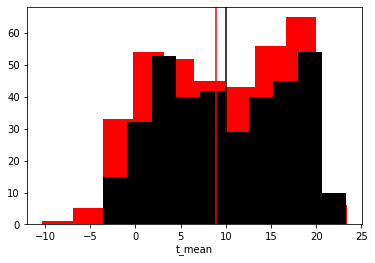

In [40]:
xr.plot.hist(monthly_mean_19, color = 'r')
xr.plot.hist(monthly_mean_20, color = 'k')
plt.axvline(monthly_mean_19.mean(), color = 'r')
plt.axvline(monthly_mean_20.mean(), color = 'k')

In [35]:
data

<xarray.Dataset>
Dimensions:  (time: 775)
Coordinates:
  * time     (time) datetime64[ns] 1954-06-01 1954-07-01 ... 2018-12-01
Data variables:
    t_mean   (time) float64 16.64 15.37 16.3 14.68 9.87 ... 16.2 11.5 5.23 3.62
    t_max    (time) float64 20.9 19.46 21.53 19.15 ... 22.21 17.35 8.74 6.23
    t_min    (time) float64 12.06 11.91 12.34 10.79 6.02 ... 10.93 6.83 2.66 1.1